In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../Training_InputFileFromDB/InputFile.csv')

In [3]:
df.sort_values(by="ID", ignore_index=True, inplace=True)

In [4]:
df.head()

ID  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0   1   24     3913.0     3102.0      689.0        0.0        0.0        0.0   
1   2   26     2682.0     1725.0     2682.0     3272.0     3455.0     3261.0   
2   3   34    29239.0    14027.0    13559.0    14331.0    14948.0    15549.0   
3   4   37    46990.0    48233.0    49291.0    28314.0    28959.0    29547.0   
4   5   57     8617.0     5670.0    35835.0    20940.0    19146.0    19131.0   

   default_payment_next_month  EDUCATION  ...  PAY_4  PAY_5  PAY_6  PAY_AMT1  \
0                           1          2  ...     -1     -2     -2       0.0   
1                           1          2  ...      0      0      2       0.0   
2                           0          2  ...      0      0      0    1518.0   
3                           0          2  ...      0      0      0    2000.0   
4                           0          2  ...      0      0      0    2000.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  SEX  
0     689.0       0.0       0.0       0.0       0.0    2  
1    1000.0    1000.0    1000.0       0.0    2000.0    2  
2    1500.0    1000.0    1000.0    1000.0    5000.0    2  
3    2019.0    1200.0    1100.0    1069.0    1000.0    2  
4   36681.0   10000.0    9000.0     689.0     679.0    1  

[5 rows x 25 columns]

In [5]:
df.shape

(30000, 25)

In [6]:
df.isna().sum()

ID                            0
AGE                           0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
default_payment_next_month    0
EDUCATION                     0
LIMIT_BAL                     0
MARRIAGE                      0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
SEX                           0
dtype: int64

In [7]:
df.dtypes

ID                              int64
AGE                             int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
default_payment_next_month      int64
EDUCATION                       int64
LIMIT_BAL                     float64
MARRIAGE                        int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
SEX                             int64
dtype: object

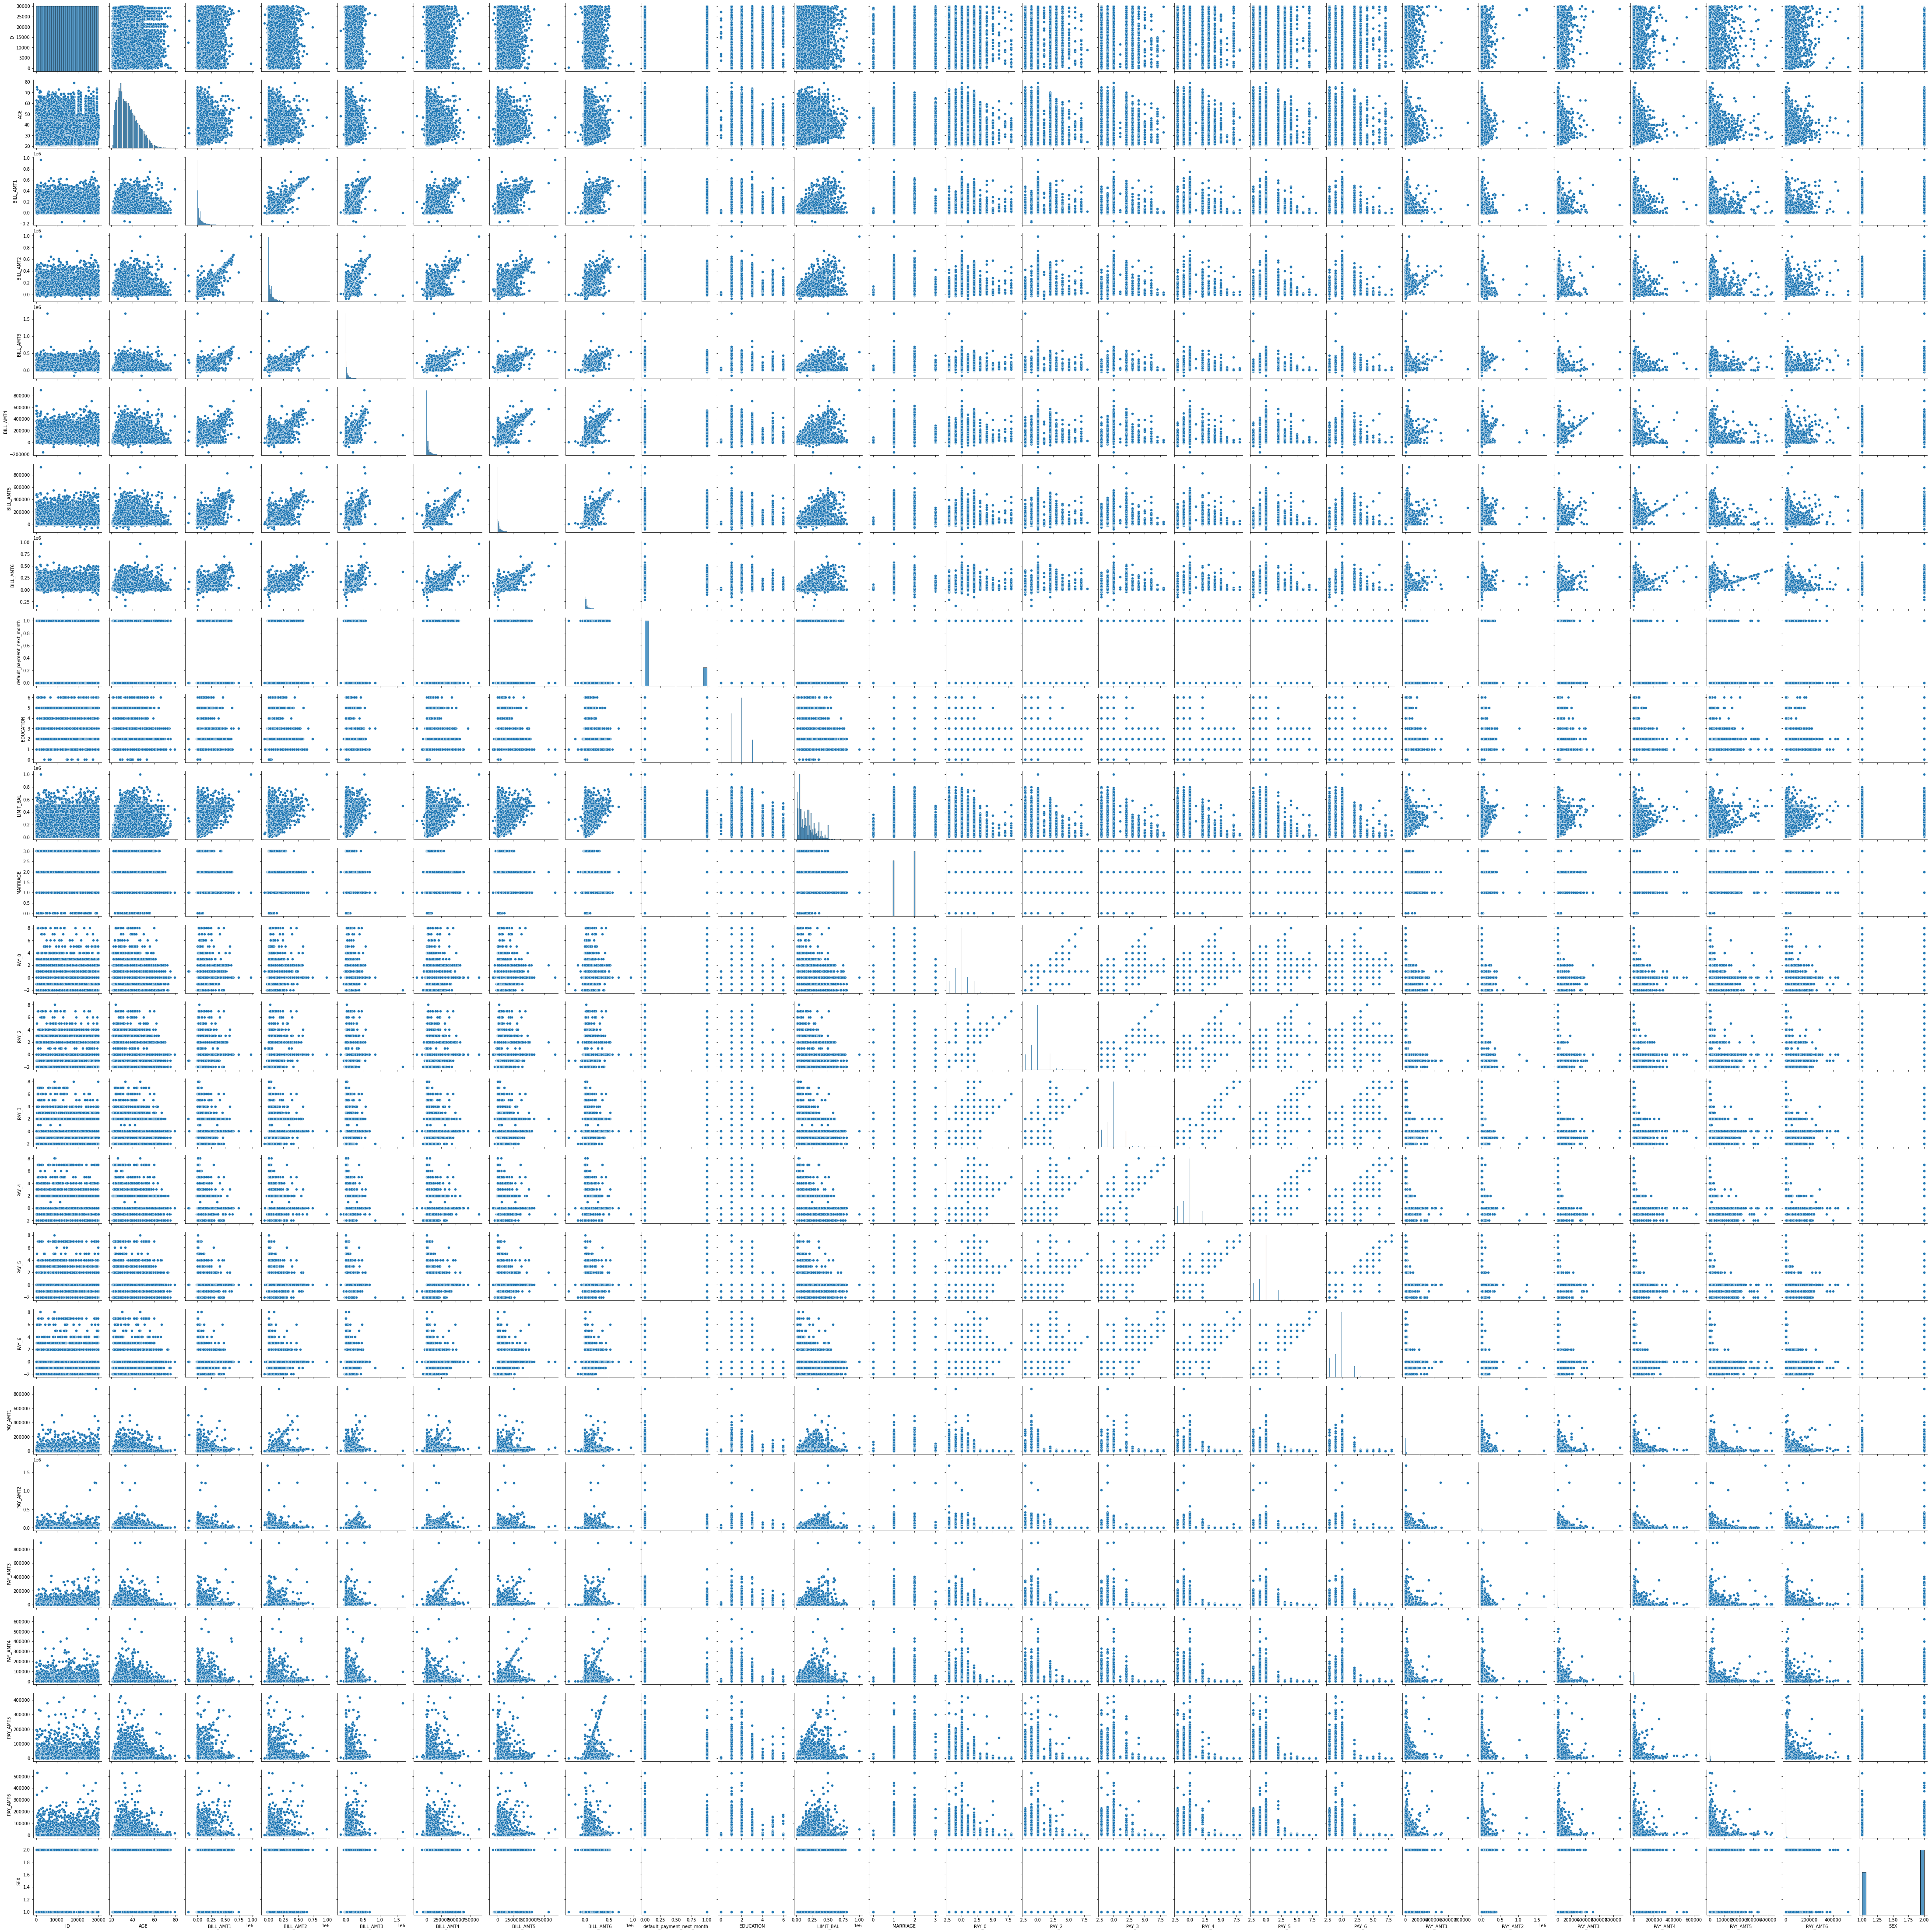

In [12]:
sns.pairplot(df)

<AxesSubplot:>

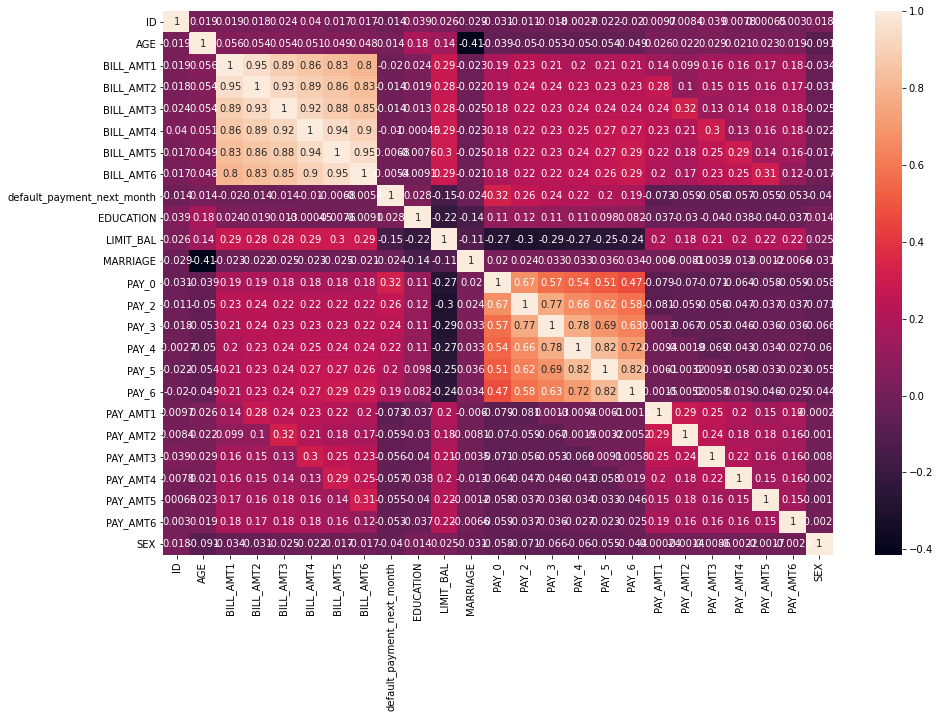

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent.

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.

In [8]:
df["default_payment_next_month"].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


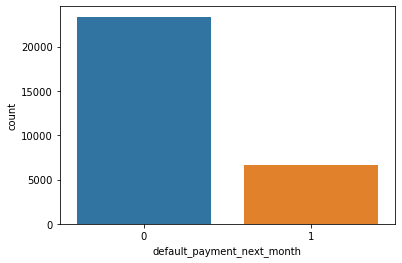

In [9]:
sns.countplot(df["default_payment_next_month"])
plt.show()

##### FROM THE ABOVE OBSERVATION WE CAN ABLE TO KNOW THAT THE ABOVE DATA IS IMBALANCED.


In [10]:
X=df.drop('default_payment_next_month', axis="columns")
X.head()

ID  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0   1   24     3913.0     3102.0      689.0        0.0        0.0        0.0   
1   2   26     2682.0     1725.0     2682.0     3272.0     3455.0     3261.0   
2   3   34    29239.0    14027.0    13559.0    14331.0    14948.0    15549.0   
3   4   37    46990.0    48233.0    49291.0    28314.0    28959.0    29547.0   
4   5   57     8617.0     5670.0    35835.0    20940.0    19146.0    19131.0   

   EDUCATION  LIMIT_BAL  ...  PAY_4  PAY_5  PAY_6  PAY_AMT1  PAY_AMT2  \
0          2    20000.0  ...     -1     -2     -2       0.0     689.0   
1          2   120000.0  ...      0      0      2       0.0    1000.0   
2          2    90000.0  ...      0      0      0    1518.0    1500.0   
3          2    50000.0  ...      0      0      0    2000.0    2019.0   
4          2    50000.0  ...      0      0      0    2000.0   36681.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  SEX  
0       0.0       0.0       0.0       0.0    2  
1    1000.0    1000.0       0.0    2000.0    2  
2    1000.0    1000.0    1000.0    5000.0    2  
3    1200.0    1100.0    1069.0    1000.0    2  
4   10000.0    9000.0     689.0     679.0    1  

[5 rows x 24 columns]

In [11]:
y=df["default_payment_next_month"]
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64

In [12]:
y.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BILL_AMT2'>

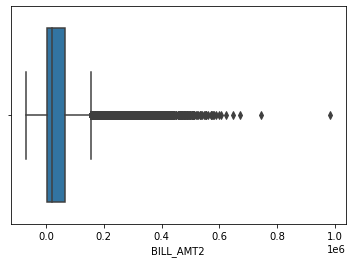

In [13]:
sns.boxplot(df['BILL_AMT2'])

In [15]:
from imblearn.combine import SMOTETomek

In [16]:
sm=SMOTETomek(random_state=30)
X_fin,y_fin=sm.fit_resample(X,y)

In [17]:
X_fin.shape,y_fin.shape

((45522, 24), (45522,))

In [18]:
from collections import Counter

In [19]:
Counter(y_fin)

Counter({1: 22761, 0: 22761})

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


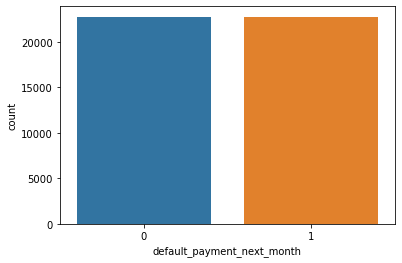

In [20]:
sns.countplot(y_fin)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y_fin,test_size=0.33,random_state=30)

In [ ]:
tr=StandardScaler()
te=StandardScaler()

In [ ]:
scaler_tr=tr.fit_transform(X_train)
scaler_te=te.fit_transform(X_test)

In [ ]:
scaled_train_df=pd.DataFrame(data=scaler_tr, columns=["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5"	,"PAY_AMT6"])

In [ ]:
scaled_train_df.head()

LIMIT_BAL       SEX  EDUCATION  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6
0   0.610648 -0.277834   0.291774  ... -0.302074 -0.312742 -0.281582
1  -1.067778 -1.272793   1.556444  ... -0.302074 -0.312742 -0.281582
2  -0.268527 -1.272793  -1.189130  ... -0.085043 -0.085011 -0.036478
3   0.290948 -1.272793   0.183657  ... -0.302074 -0.236832 -0.220306
4   0.930348  0.887244   0.183657  ...  0.421364  0.218631 -0.159030

[5 rows x 23 columns]

In [ ]:
scaled_test_df=pd.DataFrame(data=scaler_te, columns=["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5"	,"PAY_AMT6"])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [ ]:
pred_y=gnb.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac=accuracy_score(y_test, pred_y)
ac

0.5927063852524713

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [ ]:
#finding the best parameters
grid.fit(scaler_tr, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.573, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.588, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.579, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.586, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.604, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.574, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. var_smoothing=0.001, score=0.573, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.588, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.579, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.586, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.604, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.583, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.599, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_estimator_

GaussianNB(priors=None, var_smoothing=0.5)

In [ ]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [ ]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.6010553032327011

In [ ]:
param_grid_xgboost = {"n_estimators": [50,100, 130],
                      "max_depth": range(3, 11, 1),
                      "random_state":[0,50,100]
                     }

In [ ]:
from xgboost import XGBClassifier

In [ ]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [ ]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 30.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             p

In [ ]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred_y_xgb_new=xgb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [ ]:
ac_xgb_new=accuracy_score(y_test,pred_y_xgb_new)

In [ ]:
ac_xgb_new

0.5051429334758215

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=50)
model.fit(scaled_train_df,y_train)
pred_y = model.predict(scaled_test_df)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      7531
           1       0.70      0.67      0.69      7441

    accuracy                           0.69     14972
   macro avg       0.69      0.69      0.69     14972
weighted avg       0.69      0.69      0.69     14972

[[5385 2146]
 [2437 5004]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(scaled_train_df,y_train)
pred_y = model.predict(scaled_test_df)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      7531
           1       0.78      0.80      0.79      7441

    accuracy                           0.79     14972
   macro avg       0.79      0.79      0.79     14972
weighted avg       0.79      0.79      0.79     14972

[[5822 1709]
 [1488 5953]]


In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_train_df,y_train)
    pred_i = knn.predict(scaled_test_df)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

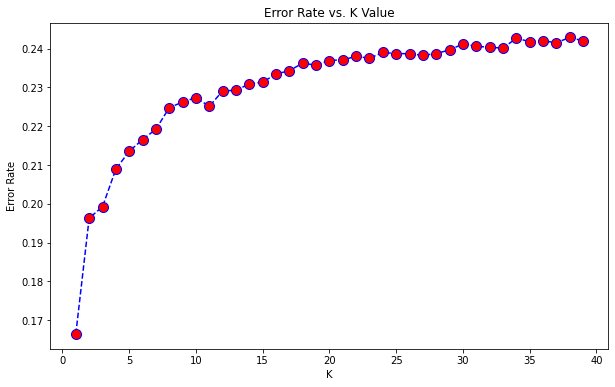

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(scaled_train_df,y_train)
pred = knn.predict(scaled_test_df)


print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[5888 1643]
 [ 849 6592]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      7531
           1       0.80      0.89      0.84      7441

    accuracy                           0.83     14972
   macro avg       0.84      0.83      0.83     14972
weighted avg       0.84      0.83      0.83     14972



In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(scaled_train_df,y_train)
pred = knn.predict(scaled_test_df)


print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[6616  915]
 [2024 5417]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      7531
           1       0.86      0.73      0.79      7441

    accuracy                           0.80     14972
   macro avg       0.81      0.80      0.80     14972
weighted avg       0.81      0.80      0.80     14972



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40,random_state=30)
model.fit(scaled_train_df,y_train)
pred = model.predict(scaled_test_df)
print("Classification Report \n")
print(classification_report(y_test,pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.09      0.17      7531
           1       0.52      0.99      0.68      7441

    accuracy                           0.54     14972
   macro avg       0.71      0.54      0.43     14972
weighted avg       0.71      0.54      0.42     14972

Confusion Matrix

[[ 714 6817]
 [  74 7367]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(scaled_train_df, y_train)
clf.cv_results_

{'mean_fit_time': array([0.60785317, 0.88071022]),
 'mean_score_time': array([0.0024085 , 0.00229585]),
 'mean_test_score': array([0.81010619, 0.81560053]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.80855263, 0.81480263]),
 'split1_test_score': array([0.82302632, 0.82006579]),
 'split2_test_score': array([0.81282895, 0.82368421]),
 'split3_test_score': array([0.81677632, 0.8125    ]),
 'split4_test_score': array([0.80855263, 0.82697368]),
 'split5_test_score': array([0.80328947, 0.80197368]),
 'split6_test_score': array([0.79828891, 0.80783152]),
 'split7_test_score': array([0.80519908, 0.82033564]),
 'split8_test_score': array([0.8153998 , 0.81342547]),
 'split9_test_score': array([0.80914775, 0.81441264]),
 'std_fit_time': array([0.01293863, 0

In [ ]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df[['param_criterion', 'mean_test_score']]

param_criterion  mean_test_score
0            gini         0.810106
1         entropy         0.815601

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion="gini",random_state=3,max_depth=1)
model.fit(scaled_train_df,y_train)
predicted_values = model.predict(scaled_test_df)
x = accuracy_score(y_test, predicted_values)
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  74.1317125300561
              precision    recall  f1-score   support

           0       0.70      0.85      0.77      7531
           1       0.81      0.63      0.71      7441

    accuracy                           0.74     14972
   macro avg       0.75      0.74      0.74     14972
weighted avg       0.75      0.74      0.74     14972



In [ ]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM.fit(scaled_train_df,y_train)
predicted_values = SVM.predict(scaled_test_df)
x = accuracy_score(y_test, predicted_values)
print("SVM's Accuracy is: ", x)
print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.7906759283996794
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      7531
           1       0.85      0.71      0.77      7441

    accuracy                           0.79     14972
   macro avg       0.80      0.79      0.79     14972
weighted avg       0.80      0.79      0.79     14972

